In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis
import seaborn as sns

In [2]:
# 데이터셋 읽기
data = pd.read_csv('Mall_Customers.csv', encoding ='cp949', low_memory=False)

In [3]:
# 데이터셋 정보
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
# 컬럼 이름 한글화
data = data.rename(columns={
    'Gender' : '성별',
    'Age': '나이',
    'Annual Income (k$)': '연간 수입(천달러)',
    'Spending Score (1-100)': '소비 점수(1~100)'
})

In [6]:
data

,CustomerID,성별,나이,연간 수입(천달러),소비 점수(1~100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


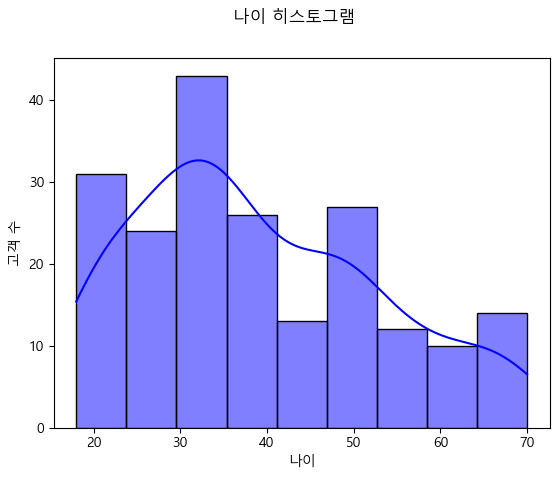

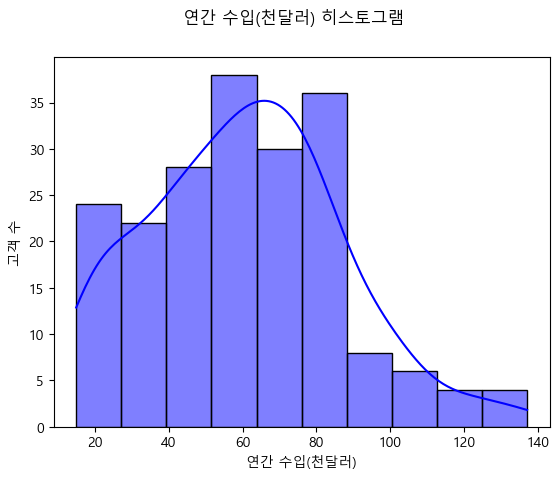

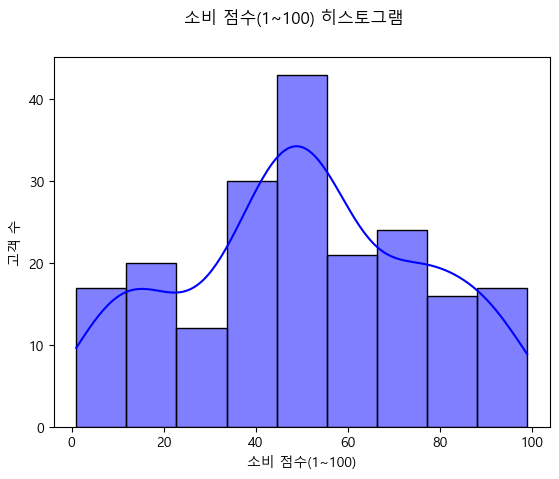

In [10]:
# 1. 나이, 연간 수입, 소비 점수 히스토그램
columns = ['나이', '연간 수입(천달러)', '소비 점수(1~100)']
for column in columns:
    sns.histplot(data[column], kde=True, color="blue")
    plt.suptitle(f'{column} 히스토그램')
    plt.ylabel('고객 수')
    plt.show()

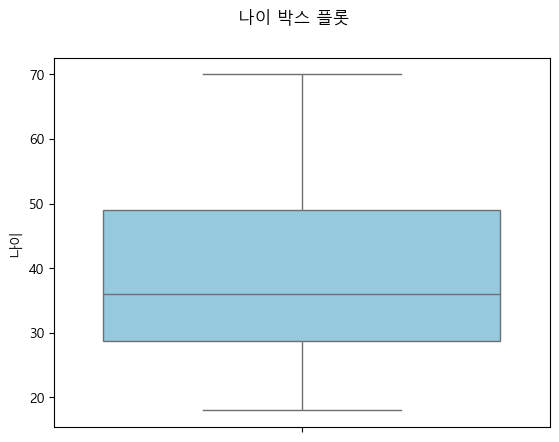

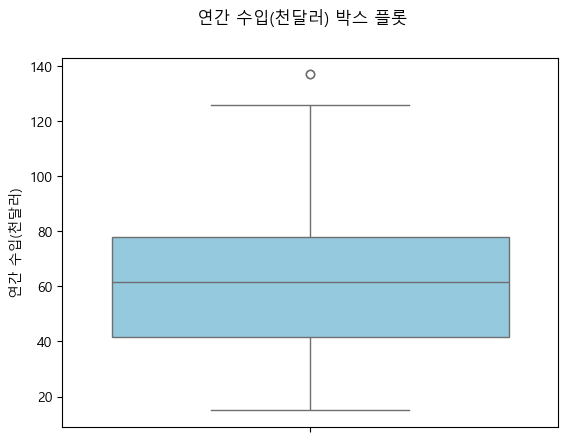

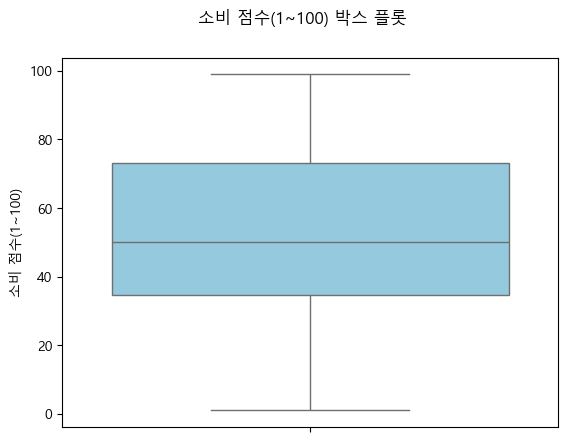

In [11]:
# 2. 나이, 연간 수입, 소비 점수 박스 플롯
columns = ['나이', '연간 수입(천달러)', '소비 점수(1~100)']
for column in columns:
    sns.boxplot(data[column], color='skyblue')
    plt.suptitle(f'{column} 박스 플롯')
    plt.show()

In [12]:
# 연령대 컬럼 추가
data['연령대'] = pd.cut(data['나이'], bins=[10, 20, 30, 40, 50, 60, 70],
                        labels=['10대', '20대', '30대', '40대', '50대', '60대'])


In [13]:
data

,CustomerID,성별,나이,연간 수입(천달러),소비 점수(1~100),연령대
0,1,Male,19,15,39,10대
1,2,Male,21,15,81,20대
2,3,Female,20,16,6,10대
3,4,Female,23,16,77,20대
4,5,Female,31,17,40,30대
...,...,...,...,...,...,...
195,196,Female,35,120,79,30대
196,197,Female,45,126,28,40대
197,198,Male,32,126,74,30대
198,199,Male,32,137,18,30대


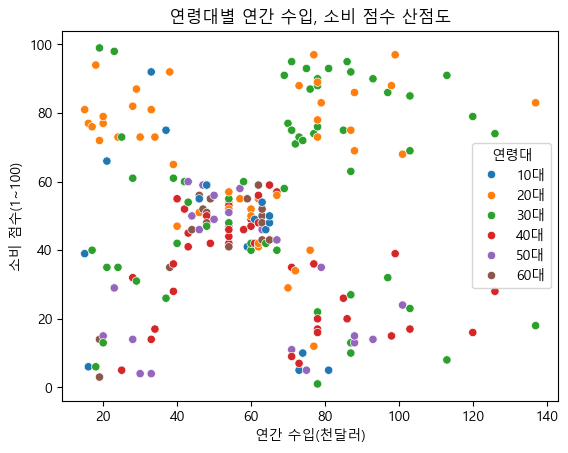

In [14]:
# 3. 연령대별 연간 수입, 소비 점수 산점도
X = data[['연간 수입(천달러)', '소비 점수(1~100)']]
sns.scatterplot(data=data, x='연간 수입(천달러)', y='소비 점수(1~100)',hue='연령대',palette='tab10')
plt.title('연령대별 연간 수입, 소비 점수 산점도')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


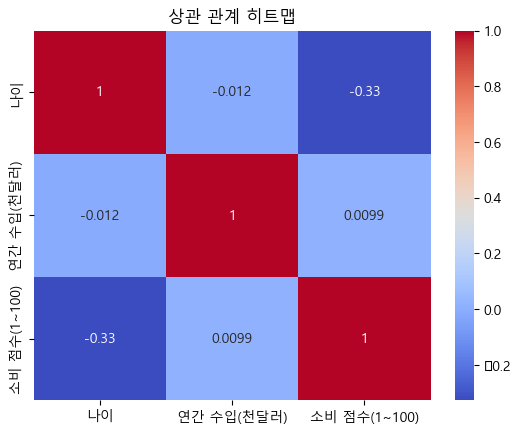

In [16]:
# 4. 상관 관계 히트맵
correlation = data[['나이', '연간 수입(천달러)', '소비 점수(1~100)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('상관 관계 히트맵')
plt.show()